# Design

**Recursive Problem Structure**:    
The subproblem is always whether or not to include a task.   
Hence, the recursive subproblem is:    
*Best_schedule_considering_n_tasks* = better of *best_schedule_excluding_task_n* and *best_schedule_including_task_n*

**Overlapping subproblem**     
Whenever we consider adding a task, we have to compare the best schedule we can make including this task against the best schedule possible when considering of all the tasks before it.


**Dynamic Programming Solution**   
We store the best schedule we can make considering all tasks up til task[n-1] and compare it against the best task we can make considering all tasks up until task[n].   

In [1]:
# set up task object

class Task:
    def __init__(self,
                 name,
                 priority,
                 duration,
                 start=-float('inf'),
                 end=-float('inf'),
                 dependencies = []):
        self.name = name
        self.priority = priority
        self.duration = duration
        self.start = start
        self.end = end
        self.dependencies = dependencies

In [2]:
# filter out tasks with incpomplete dependent tasks
def filterIncomplete(tasks,record):
    mod = tasks
    for task in mod:
        if not task.dependencies:
            break
        for dep in task.dependencies:
            if dep not in record:
                mod.remove(task)
    return(mod)

# search for next task with last compatible end time    
def find_latest_compatible_task(task, start_index):
    # Initialize 'lo' and 'hi' for binary search
    low = 0
    high = start_index - 1
  
    # Perform binary search 
    while low <= high: 
        mid = (low + high) // 2
        if task[mid].end <= task[start_index].start: 
            if task[mid + 1].end <= task[start_index].start: 
                low = mid + 1
            else: 
                return mid 
        else: 
            high = mid - 1
    return -1

# set start and end times for tasks without fixed times
def set_rel_times(tasks,lastStart):
    mod = tasks
    for task in mod:
        # if task has no fixed end time
        if task.end == -float('inf'):
            task.end = lastStart
            task.start = lastStart - task.duration   
    return(mod)


def best_schedule(tasks):
    # sort tasks by end time, to allow binary search
    # using python array methods since it's a DP assignment
    tasks = sorted(tasks, key = lambda j: j.end) 
    
    # store total "achieved" for tasks until and including task i
    store = [0 for _ in range(len(tasks))]
    schedule = [[] for _ in range(len(tasks))]
    
    store[0] = tasks[0].priority
    schedule[0] = [tasks[0].name]
    
    # fill in store
    for i in range(1,len(tasks)):
        store[i] = tasks[i].priority
        schedule[i] = [tasks[i].name]
        processed = set_rel_times(filterIncomplete(tasks,store[i]),tasks[i].start)
        print(processed)
        latest = find_latest_compatible_task(processed,i)
        if latest != -1:
            store[i] += store[latest]
            schedule[i] = schedule[latest] + schedule[i]
            
        # update store with max possible achievement
        if store[i] < store[i-1]:
            store[i] = store[i-1] 
            schedule[i] = schedule[i-1]
            
    return(store,schedule)

In [3]:
# set up inputs

# Inputs

taskL = ['pcw','class','eat','exercise','work','visa','landmark','dance','sleep']
priorityL = [2,3,1,2,4,5,1,1,3]
durationL = [1,2,1,1,2,3,2,2,6]
startL = [16,17,-float('inf'),-float('inf'),11,9,8,10,24]
endL = [17,19,-float('inf'),-float('inf'),13,17,17,22,float("inf")]
dependenciesL = [[],['pcw'],[],[],['prep'],['get docs','get cash'],[],[],[]]

# preprocess dependency tasks as separate tasks
for i in range(len(taskL)):
    if dependenciesL[i]:
        for dep in dependenciesL[i]:
            # set to the higher priority
            if dep in taskL:
                if priorityL[i] >= priorityL[taskL.index(dep)]:
                    priorityL[taskL.index(dep)] = priorityL[i] + 1
            else:
                # add task
                taskL.append(dep)
                priorityL.append(priorityL[i] + 1)
                durationL.append(1) # ASSUMPTION
                startL.append(-float('inf'))
                endL.append(-float('inf'))
                dependenciesL.append(None)

tasks = []

for i in range(len(taskL)):
    tasks.append(Task(taskL[i],priorityL[i],durationL[i],startL[i],endL[i],dependenciesL[i]))

In [4]:
print(tasks[i].dependencies)

None


In [5]:
# Driver code to test above function 
util, schedule = best_schedule(tasks)
print("Optimal schedule is"), 
print(schedule[-1])
print('with a utility of',util[-1])

[<__main__.Task object at 0x10969bd30>, <__main__.Task object at 0x10969bd68>, <__main__.Task object at 0x10969beb8>, <__main__.Task object at 0x10969bef0>, <__main__.Task object at 0x10969bf28>, <__main__.Task object at 0x10969bda0>, <__main__.Task object at 0x10969bcc0>, <__main__.Task object at 0x10969bdd8>, <__main__.Task object at 0x10969be10>, <__main__.Task object at 0x10969bcf8>, <__main__.Task object at 0x10969be48>, <__main__.Task object at 0x10969be80>]
[<__main__.Task object at 0x10969bd30>, <__main__.Task object at 0x10969bd68>, <__main__.Task object at 0x10969beb8>, <__main__.Task object at 0x10969bef0>, <__main__.Task object at 0x10969bf28>, <__main__.Task object at 0x10969bda0>, <__main__.Task object at 0x10969bcc0>, <__main__.Task object at 0x10969bdd8>, <__main__.Task object at 0x10969be10>, <__main__.Task object at 0x10969bcf8>, <__main__.Task object at 0x10969be48>, <__main__.Task object at 0x10969be80>]
[<__main__.Task object at 0x10969bd30>, <__main__.Task object 

In [6]:
print("Optimal schedule is"), 
print(schedule[-1])
print('with a utility of',util[-1])

Optimal schedule is
['get cash', 'work', 'pcw', 'class', 'sleep']
with a utility of 20


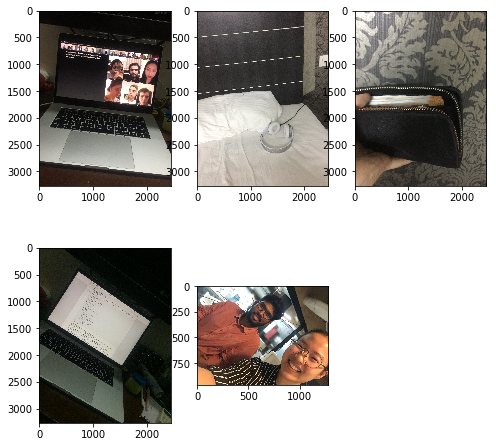

In [8]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img1 = mpimg.imread('img1.png')
img2 = mpimg.imread('img2.png') 
img3 = mpimg.imread('img3.png') 
img4 = mpimg.imread('img4.png') 
img5 = mpimg.imread('img5.png') 

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 2

fig.add_subplot(2, 3, 1)
plt.imshow(img1)
fig.add_subplot(2, 3, 2)
plt.imshow(img2)
fig.add_subplot(2, 3, 3)
plt.imshow(img3)
fig.add_subplot(2, 3, 4)
plt.imshow(img4)
fig.add_subplot(2, 3, 5)
plt.imshow(img5)

plt.show()

# Analysis     

## Good     
**Accurate**        
My program takes any time constraints and task dependencies into account through the filterIncomplete() and findLatestCompatible() functions. Thus, it will not provide any "impossible" schedules. Since we also search for the best possible schedule including/ excluding each task, it is guaranteed to find the optimal solution.

**Time Efficient**        
The program will take O(nlgn) where n is the number of tasks considered. This is because it iterates n times (considering the inclusion of task n) and in each iteration, it searches for the best pre-solved subproblem of the best pre-series of tasks compatible to it using a binary search (lgn).

**Fairly Space Efficient**     
The program will take O(n) space since it simply stores the best schedules from start to n time.   

**Modularized**      
I've separated my code into objects and helper functions to increase the understandabiilty and ease of maintaining.


## Bad
One problem with the scheduler for me is that it does not consider locations or travel times. To get cash I need to spend 15 minutes going to the bank from my home, to go to work I have to spend 30 minutes going to the office from my home. However, this could also be optimized because the bank is on the way to work for me. Coincidentally this is optimized in the schedule the program gave me, but the program itself does not have any mechanism for considering location or optimizing for travel. This would require some kind of store of locations and relative distances between locations, and then some kind of consideration of utility of each task considering the last location of the last task. 


**Words: 250**

# HCs

**#regression:** I spent a lot of time designing the recursive nature of the subproblem and solutions before designing the solution. This is because the dynamic programmming solution depends on structuring your solution to tackle the optimal sequence of subproblems.

**#rightproblem:** To create the solution, I first recognized that the actual problem we were trying to solve when breaking it down was whether task i should be included and what effect that would have on overall schedule utility.

**#utility:** My entire solution was built around maximizing utility. To do this, I had to recognize relative utility (greedy algo won't work because the highest utility task might prevent combinations of tasks with higher utility; task dependencies should have slightly higher utilities than the task themselves as they enable the task to be done).

**#modelling:** I spent a lot of time trying to model the graph of subproblems that would enable an elegant dynamic programming solution, and that required trying different definitions of subproblems, relationships between those, and overall recursive optimal solution structure as a result of the model. 

**#optimization:** By ensuring I solved smaller subproblems before larger "parent" subproblems, I optimized both time (no repeated computations) and space (only need to store best solution to subproblem rather than all permutations).